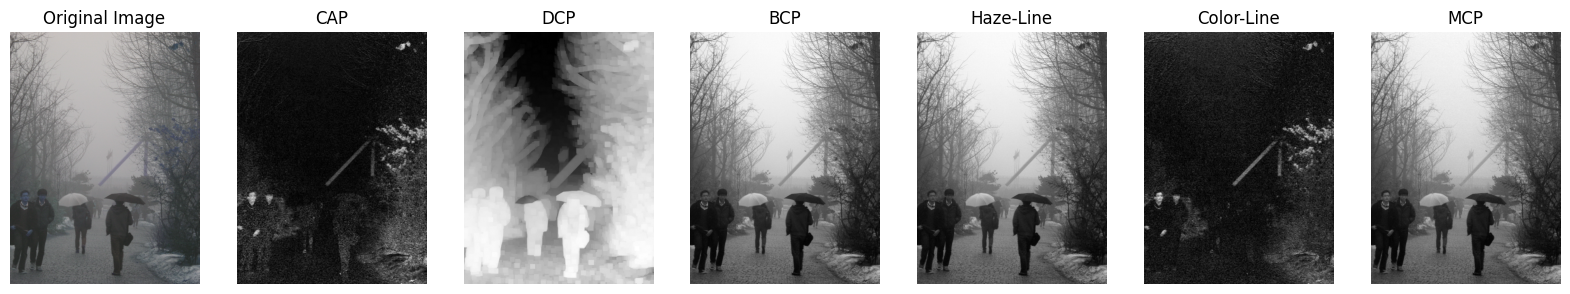

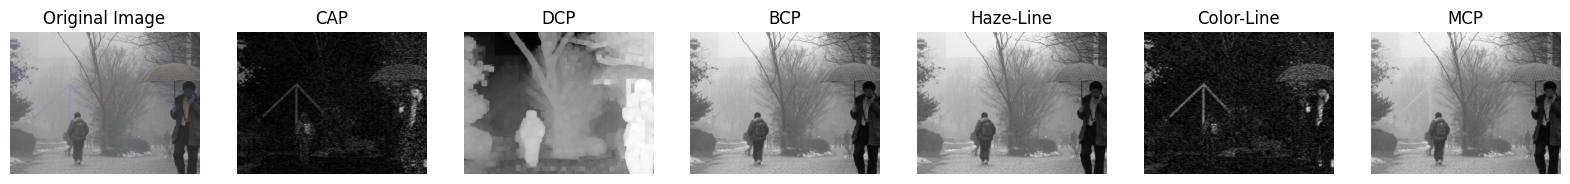

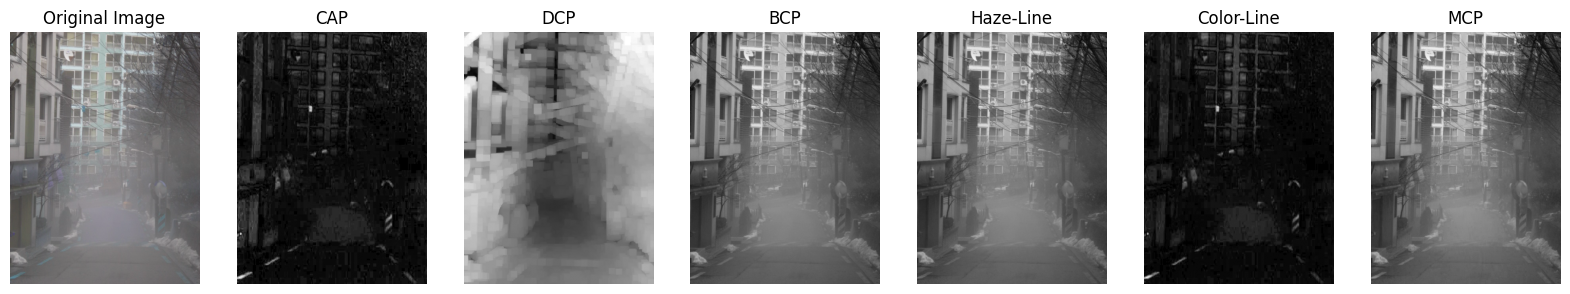

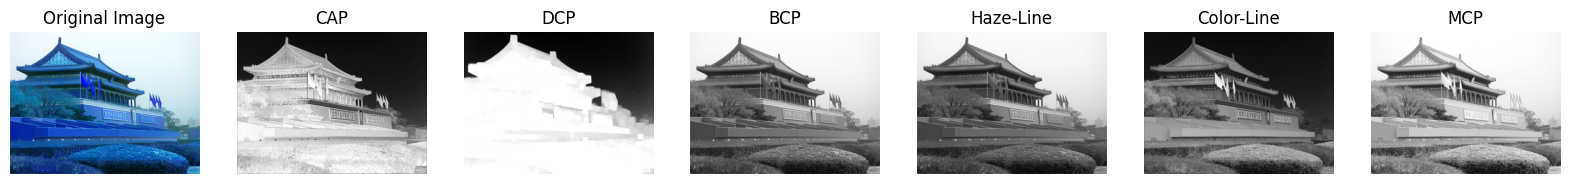

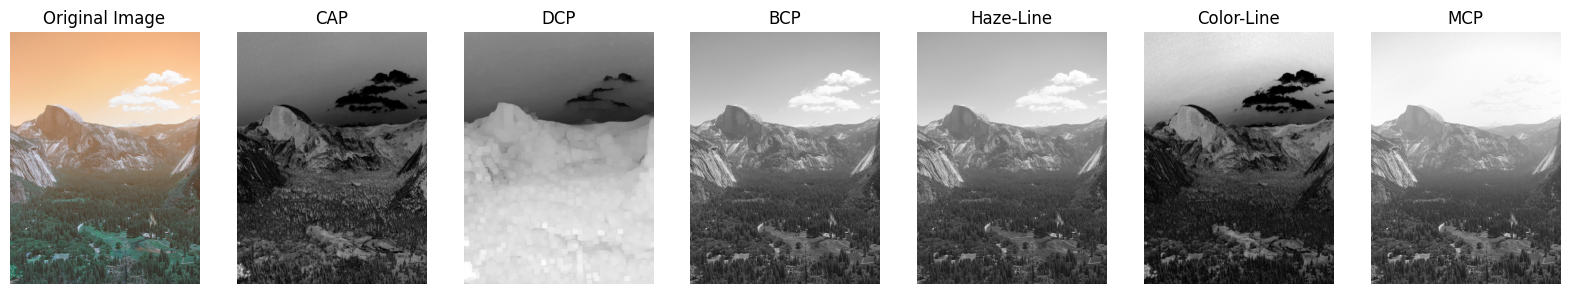

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

def compute_cap_transmission(image, omega=0.95):
    """Color Attenuation Prior (CAP)"""
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2]
    saturation = hsv[:, :, 1]
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    """Dark Channel Prior (DCP)"""
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

def compute_bcp_transmission(image, omega=0.95):
    """Brightness Consistency Prior (BCP)"""
    image = image.astype(np.float32) / 255.0
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    beta = np.max(gray) + 1e-5
    transmission = 1 - omega * (beta - gray)
    return np.clip(transmission, 0, 1)

def compute_haze_line_transmission(image, omega=0.95):
    """Haze-Line Prior"""
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

def compute_color_line_transmission(image, omega=0.95):
    """Color-Line Prior"""
    image = image.astype(np.float32) / 255.0
    std_dev = np.std(image, axis=2)
    beta = np.max(std_dev) + 1e-5
    transmission = 1 - omega * (beta - std_dev)
    return np.clip(transmission, 0, 1)

def compute_mcp_transmission(image, omega=0.95):
    """Maximum Channel Prior (MCP)"""
    image = image.astype(np.float32) / 255.0
    max_channel = np.max(image, axis=2)
    beta = np.max(max_channel) + 1e-5
    transmission = 1 - omega * (beta - max_channel)
    return np.clip(transmission, 0, 1)

def compute_all_priors(image):
    """Computes all priors and returns as a tensor."""
    priors = {
        "Original Image": image / 255.0,
        "CAP": compute_cap_transmission(image),
        "DCP": compute_dcp_transmission(image),
        "BCP": compute_bcp_transmission(image),
        "Haze-Line": compute_haze_line_transmission(image),
        "Color-Line": compute_color_line_transmission(image),
        "MCP": compute_mcp_transmission(image),
    }
    return priors

def visualize_priors(image):
    """Compute priors and display them side by side."""
    priors = compute_all_priors(image)
    fig, axes = plt.subplots(1, len(priors), figsize=(20, 5))
    
    for ax, (title, prior) in zip(axes, priors.items()):
        ax.imshow(prior, cmap="gray" if title != "Original Image" else None)
        ax.set_title(title, fontsize=12)
        ax.axis("off")
    
    plt.show()

image_path = "dataset/base/train/St_Wf_D_L__033.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__029.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__009.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/95.png"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/99.png"
image = cv2.imread(image_path)
visualize_priors(image)



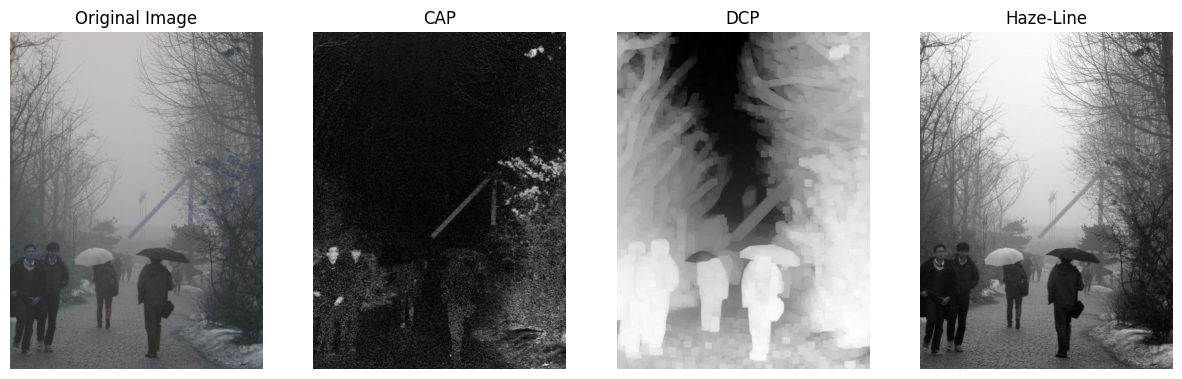

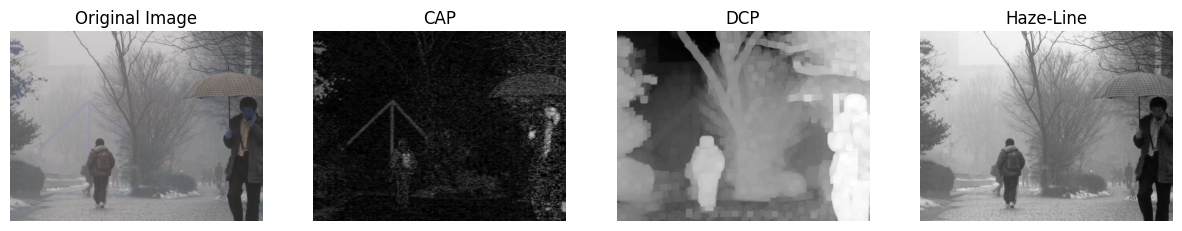

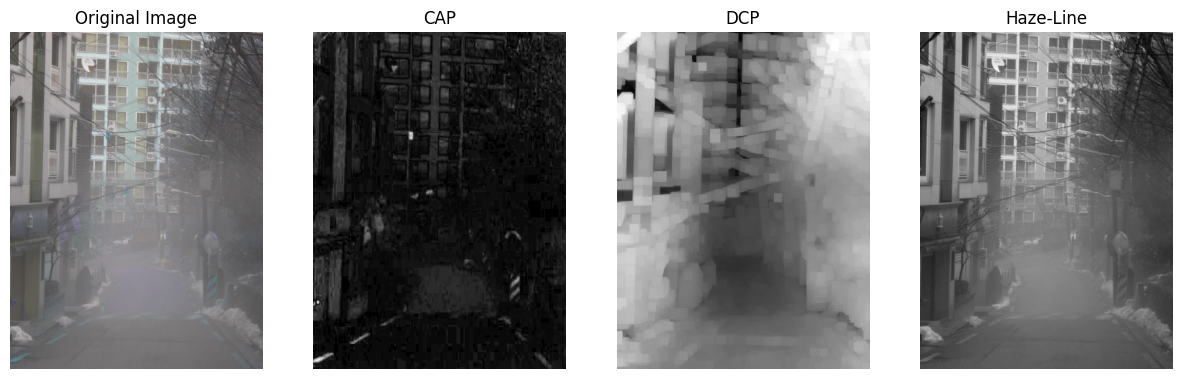

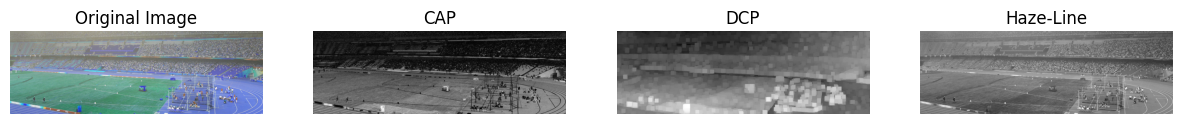

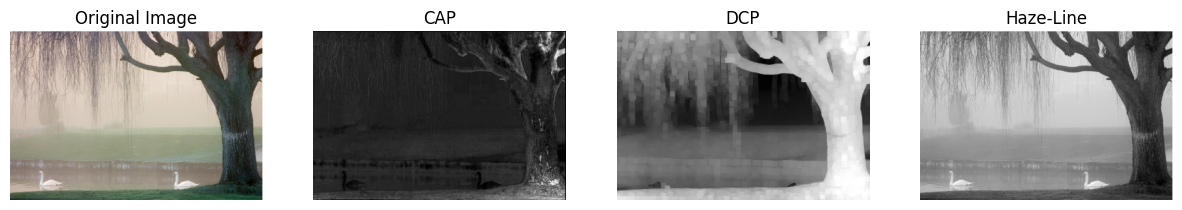

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

def compute_cap_transmission(image, omega=0.95):
    """Color Attenuation Prior (CAP)"""
    image = image.astype(np.float32) / 255.0
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    brightness = hsv[:, :, 2]
    saturation = hsv[:, :, 1]
    beta = np.max(brightness) + 1e-5
    transmission = 1 - omega * (beta - saturation)
    return np.clip(transmission, 0, 1)

def compute_dcp_transmission(image, omega=0.95, patch_size=15):
    """Dark Channel Prior (DCP)"""
    image = image.astype(np.float32) / 255.0
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))
    dark_channel = cv2.erode(min_channel, kernel)
    transmission = 1 - omega * dark_channel
    return np.clip(transmission, 0, 1)

def compute_haze_line_transmission(image, omega=0.95):
    """Haze-Line Prior"""
    image = image.astype(np.float32) / 255.0
    mean_intensity = np.mean(image, axis=2)
    beta = np.max(mean_intensity) + 1e-5
    transmission = 1 - omega * (beta - mean_intensity)
    return np.clip(transmission, 0, 1)

def compute_all_priors(image):
    """Computes selected priors and returns as a tensor."""
    priors = {
        "Original Image": image / 255.0,
        "CAP": compute_cap_transmission(image),
        "DCP": compute_dcp_transmission(image),
        "Haze-Line": compute_haze_line_transmission(image),
    }
    return priors

def visualize_priors(image):
    """Compute priors and display them side by side."""
    priors = compute_all_priors(image)
    fig, axes = plt.subplots(1, len(priors), figsize=(15, 5))
    
    for ax, (title, prior) in zip(axes, priors.items()):
        ax.imshow(prior, cmap="gray" if title != "Original Image" else None)
        ax.set_title(title, fontsize=12)
        ax.axis("off")
    
    plt.show()



image_path = "dataset/base/train/St_Wf_D_L__033.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__029.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/train/St_Wf_D_L__009.JPG"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/91.jpg"
image = cv2.imread(image_path)
visualize_priors(image)
image_path = "dataset/base/test/92.jpg"
image = cv2.imread(image_path)
visualize_priors(image)